In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#Reading the data
dataset = pd.read_csv('/home/sayan/Documents/Assignment_3files/sonar.all-data', header = None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [14]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [15]:
x = dataset.iloc[:,:60]
x.shape

(208, 60)

In [16]:
y_ = dataset.iloc[:,-1]
y_
len(y_)
y_[0]

'R'

In [96]:
from pandas import Series
Y = []
for i in range(len(y_)):
    if y_[i] == "R":
        Y.append(0)
    else:
        Y.append(1)
        
y = Series(Y)
y.shape

(208,)

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [19]:
#feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)  

# RandomForest

In [97]:
#Training the Algorithm

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 20, random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [98]:
#Evaluating the Algorithm

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test,y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.71      0.79        21
           1       0.76      0.90      0.83        21

   micro avg       0.81      0.81      0.81        42
   macro avg       0.82      0.81      0.81        42
weighted avg       0.82      0.81      0.81        42


Confusion Matrix:
[[15  6]
 [ 2 19]]

Accuracy Score:
0.8095238095238095


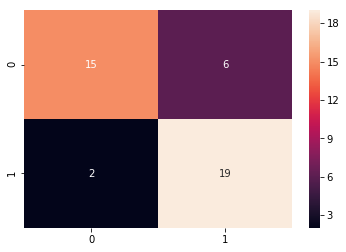

In [99]:
import seaborn as sn
sn.heatmap(confusion_matrix(y_test,y_pred), annot=True)

In [22]:
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(classifier.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [23]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 5 )]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [1, 3, 5, 7, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [24]:
# Using the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
cl_random = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=0, n_jobs = -1)

# Fit the random search model
cl_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.3min finished
/home/sayan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 3, 5, 7, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [25]:
cl_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
#Evaluating random search
def evaluate(model, x_test, y_test):
    y_pred = model.predict(x_test)
    errors = abs(y_pred - y_test)
    accuracy = (accuracy_score(y_test, y_pred))*100
    print('Model Performance')
    print('Average Error: {:0.4f}'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

In [28]:
base_model_accuracy = evaluate(classifier, x_test, y_test)

Model Performance
Average Error: 0.1905
Accuracy = 80.95%.


In [29]:
cl_random.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [30]:
classifier_random = cl_random.best_estimator_

random_accuracy_score = evaluate(classifier_random, x_test, y_pred)

Model Performance
Average Error: 0.0714
Accuracy = 92.86%.


In [31]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy_score - base_model_accuracy) / random_accuracy_score))

Improvement of 12.82%.


# SVM

In [84]:
#import support vector classifier
from sklearn.svm import SVC
clf = SVC(kernel='rbf')

clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [85]:
y_pred = clf.predict(x_test)

In [86]:
#Evaluating the Algorithm
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test,y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.76      0.84        21
           1       0.80      0.95      0.87        21

   micro avg       0.86      0.86      0.86        42
   macro avg       0.87      0.86      0.86        42
weighted avg       0.87      0.86      0.86        42


Confusion Matrix:
[[16  5]
 [ 1 20]]

Accuracy Score:
0.8571428571428571


In [87]:
# Look at parameters used by SVM
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto_deprecated',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


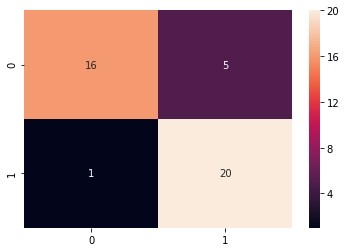

In [88]:
sn.heatmap(confusion_matrix(y_test,y_pred), annot=True)

In [89]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

def svc_param_selection(x_train, y_train, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma': gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv = nfolds, verbose=2,  n_jobs = -1)
    grid_search.fit(x_train,y_train)
    #grid_search.best_params_
    return grid_search#.best_params_


In [90]:
svc_random = svc_param_selection(x_train, y_train, 3)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  60 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.2s finished
/home/sayan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [91]:
svc_random.best_params_

{'C': 10, 'gamma': 0.01}

In [92]:
svc_random.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [93]:
svc_base_model_accuracy = evaluate(clf, x_test, y_test)

Model Performance
Average Error: 0.1429
Accuracy = 85.71%.


In [94]:
svc_classifier_random = svc_random.best_estimator_

random_accuracy_score = evaluate(svc_classifier_random, x_test, y_pred)

Model Performance
Average Error: 0.0952
Accuracy = 90.48%.


In [95]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy_score - svc_base_model_accuracy) / random_accuracy_score))

Improvement of 5.26%.


# Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [44]:
dc = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
dc.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [45]:
y_pred = dc.predict(x_test)

In [46]:
#Evaluating the Algorithm
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test,y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.76      0.78        21
           1       0.77      0.81      0.79        21

   micro avg       0.79      0.79      0.79        42
   macro avg       0.79      0.79      0.79        42
weighted avg       0.79      0.79      0.79        42


Confusion Matrix:
[[16  5]
 [ 4 17]]

Accuracy Score:
0.7857142857142857


In [47]:
# Look at parameters used by Gini
print('Parameters currently in use:\n')
pprint(dc.get_params())

Parameters currently in use:

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 100,
 'splitter': 'best'}


In [48]:
max_depth = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 20, num = 5)]
min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)]

In [49]:
param_grid_dc = {"max_depth":max_depth, "min_samples_split":min_samples_split, "min_samples_leaf":min_samples_leaf}

In [50]:
dc_random = RandomizedSearchCV(estimator = dc, param_distributions = param_grid_dc, n_iter = 100, cv = 3, verbose=2, random_state=0, n_jobs = -1)

In [51]:
dc_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.3s finished
/home/sayan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'max_depth': [1, 3, 5, 7, 10], 'min_samples_split': [2, 6, 11, 15, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [52]:
dc_random.best_params_

{'min_samples_split': 6, 'min_samples_leaf': 5, 'max_depth': 10}

In [53]:
dc_base_model_accuracy = evaluate(dc, x_test, y_test)

Model Performance
Average Error: 0.2143
Accuracy = 78.57%.


In [55]:
dc_classifier_random = dc_random.best_estimator_

dc_random_accuracy_score = evaluate(dc_random, x_test, y_pred)

Model Performance
Average Error: 0.0238
Accuracy = 97.62%.


In [56]:
print('Improvement of {:0.2f}%.'.format( 100 * (dc_random_accuracy_score - dc_base_model_accuracy) / dc_random_accuracy_score))

Improvement of 19.51%.
